# Explore the Central Limit Theorem.

### Inspired by: https://news.ycombinator.com/item?id=21909445
### Date: 20191230

In [85]:
import random
import pandas as pd
import numpy as np
from collections import OrderedDict, Counter


# Exploration 1: dice-roll.
### Problem statement: https://news.ycombinator.com/item?id=21912100
> He's the example I have my students do in class. Roll a die repeatedly and tally the results. You'll get a (roughly) uniform distribution of 1s, 2s, 3s, 4s, 5s, and 6s.
> Now to illustrate the CLT, you roll a die 50 times, and average the result. AND your 300 classmates do the same. If you tally the 301 averages, the distribution of the averages will not be uniform but bell-shaped, with average (approximately) 3.5.
> The CLT says (roughly) the distribution of the averages will be approximately normal, regardless of the original distribution.

In [86]:
# init student data structures & roll die - we can trivially keep all the rolls in RAM, so just store arrays.
students = OrderedDict( {} )  # use an OD so we can recover the order of insertion from a DataFrame downstream, if we want to...
for i in range(0,300):      # 300 students
    students[i] = []

    for r in range(0,50):   # 50 rolls per student
        students[i].append( random.randint(1,6) )  # randint is inclusive on both ends; a <= x <= b
assert len( students.keys() ) == 300    # check student count
assert len( students[0] ) == 50         # spot-check student 0
print( str( students[0] ) )             # visually inspect student 0 rolls



[1, 4, 3, 2, 5, 6, 2, 2, 2, 4, 3, 6, 6, 2, 2, 3, 6, 5, 5, 4, 6, 6, 4, 1, 5, 5, 2, 4, 2, 6, 1, 2, 1, 5, 5, 2, 3, 2, 4, 4, 1, 3, 4, 3, 5, 1, 4, 5, 1, 5]


 # Analysis

In [87]:
df = pd.DataFrame( dict.fromkeys( list(range(1,7)), [] ) )
for k in students.keys():
    df = df.append( Counter( students[k] ) , ignore_index=True )
print( df.shape )
df.describe()


(300, 6)


,1,2,3,4,5,6
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,8.176667,8.296667,8.363333,8.456667,8.506667,8.200000
std,2.609243,2.632824,2.770724,2.637799,2.763224,2.527441
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000
50%,8.000000,8.000000,8.000000,8.500000,8.000000,8.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000


[2.66, 2.88, 2.98, 2.98, 3.04, 3.04, 3.04, 3.06, 3.06, 3.08, 3.08, 3.08, 3.08, 3.08, 3.08, 3.1, 3.1, 3.1, 3.1, 3.1, 3.12, 3.14, 3.14, 3.18, 3.18, 3.18, 3.18, 3.2, 3.22, 3.24, 3.24, 3.24, 3.24, 3.24, 3.24, 3.26, 3.26, 3.26, 3.26, 3.26, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.32, 3.34, 3.34, 3.34, 3.34, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.36, 3.38, 3.38, 3.38, 3.38, 3.38, 3.38, 3.38, 3.38, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.42, 3.44, 3.44, 3.44, 3.44, 3.44, 3.44, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.48, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.52, 3.54, 3.54, 3.54, 3.54, 3.54, 3.54,

<AxesSubplot:>

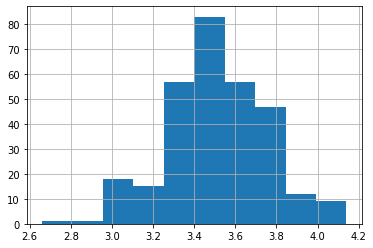

In [88]:
# Okay, as expected we see a roughly uniform distribution of 1s through 6s.
#
# Now suppose we take the mean of the *roll values* for each student (mean of each student's roll list),
# then look at the distribution of averages?
avg_per_student = sorted([ np.mean( students[k] ) for k in students.keys() ])
print( avg_per_student )
pd.Series( avg_per_student ).hist()


# Explanation:
## Wow! The distribution of averages really looks ~Gaussian ("normal").

### But... is it actually Gaussian? A Kolmogorov-Smirnov test or (especially) Shapiro-Wilk test can give some confidence:

In [89]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
from scipy import stats

alpha = 0.01

# Let's run 2 tests of normality: Kolmogorov-Smirnov, and Shapiro-Wilk (found to have greater power than K-S, via Monte Carlo simulation: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test ).
ks_rslt = stats.kstest( avg_per_student , 'norm' )
sw_rslt = stats.shapiro( avg_per_student )

print("Kolmogorov-Smirnov returns: statistic={} at p-value={} ==> {}reject the H0 that the data are drawn from a Gaussian.".format( str( ks_rslt.statistic ) , str( ks_rslt.pvalue ) , "" if ks_rslt.pvalue < alpha else "fail to " ))
print("Shapiro-Wilk returns: statistic={} at p-value={} ==> {}reject the H0 that the data are drawn from a Gaussian.".format( str( sw_rslt[0] ) , str( sw_rslt[1] ) , "" if sw_rslt[1] < alpha else "fail to " ))


Kolmogorov-Smirnov returns: statistic=0.9960929674251472 at p-value=0.0 ==> reject the H0 that the data are drawn from a Gaussian.
Shapiro-Wilk returns: statistic=0.994568943977356 at p-value=0.36599603295326233 ==> fail to reject the H0 that the data are drawn from a Gaussian.


### For Shapiro-Wilk: given p < 0.01, we can safely say the dice-roll result exhibits a Gaussian shape.

### This result allows us to use parametric statistical methods on our dice-roll dataset. (via: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

### But, the K-S test has p=0 -- which, given that p-values are almost never exactly 0, suggests something is wrong.
### It turns out there's a problem with using K-S (at least NumPy's implementation): it requires a continuous density function (CDF): https://stackoverflow.com/a/46679086

### Let's try again, per the SO post.

In [90]:
n = stats.norm( stats.norm.fit( avg_per_student ) )
n
# #%%
# import matplotlib.pyplot as plt

# plt.hist( avg_per_student , bins=np.arange( min( avg_per_student ) , max( avg_per_student ) + 0.1 , 0.1 ), rwidth=0.5 )
# plt.show()
# #%%
# x = np.arange( min(avg_per_student) , max(avg_per_student) + 0.1 , 0.1 )
# print( x )
# n.pdf( x )
# # plt.plot( x , n.pdf(x) )
# # plt.show()

# I can't get n.pdf() working: I keep getting "ValueError: operands could not be broadcast together with shapes (15,) (2,)", and it's not clear what pdf() is doing under the hood without digging into the code... moving on.


In [91]:
ks_rslt = stats.kstest( avg_per_student , n.cdf )  # throws "ValueError: operands could not be broadcast together with shapes (300,) (2,)". ==> Dot-product dimensionality error... But what to do differently?
print("Kolmogorov-Smirnov returns: statistic={} at p-value={} ==> {}reject the H0 that the data are drawn from a Gaussian.".format( 
    str( ks_rslt.statistic ) , 
    str( ks_rslt.pvalue ) , 
    "" if ks_rslt.pvalue < alpha else "fail to " ))


ValueError: operands could not be broadcast together with shapes (300,) (2,) 

In [92]:
# data science study cards say that "random samples of the mean converge to a normal distribution with mean u and stddev sigma / sqrt(N)"
for i in range(0, 5):
    sample = np.random.choice( np.array( avg_per_student ) , 5 , replace=False )
    # print(sample)
    print([ round(np.mean(sample),2) , round(np.std(sample),2) , round(np.std(sample) / math.sqrt( len(sample) ), 2 ) ])


[3.72, 0.22, 0.1]
[3.67, 0.3, 0.13]
[3.5, 0.19, 0.08]
[3.53, 0.17, 0.08]
[3.1, 0.2, 0.09]


In [93]:
[ n.mean() , n.std() ]

[array([3.5084    , 0.23876091]), array([1., 1.])]